# Time Series Analysis - ETS (Error, Trend, Seasonality)

## Overview
This notebook explores ETS (Error-Trend-Seasonality) decomposition for time series analysis.

### What is ETS?
ETS decomposes a time series into three components:
- **Trend (T)**: Long-term progression (increasing/decreasing)
- **Seasonality (S)**: Repeating patterns (daily, monthly, quarterly)
- **Error/Residual (E)**: Random noise after removing trend & seasonality

**Models:**
- **Additive**: Y = T + S + E (when variations are constant)
- **Multiplicative**: Y = T × S × E (when variations grow with level)

### Applications:
- Identify underlying trends
- Detect seasonal patterns (retail sales, tourism)
- Improve forecasting accuracy
- Anomaly detection (residuals analysis)

---

## 1. Setup & Data Loading

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

%matplotlib inline

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 10)

In [22]:
# Load airline passengers csv dataset - classic example with trend & seasonality
# Monthly totals of international airline passengers (1949-1960)
airline = pd.read_csv('airline_passengers.csv', index_col='Month')
airline.dropna(inplace=True)

# Convert to proper datetime
airline.index = pd.to_datetime(airline.index)
airline.head()


print("Dataset info:")
print(f"Period: {airline.index.min()} to {airline.index.max()}")
print(f"Frequency: Monthly")
print(f"Length: {len(airline)} observations")
print(f"\nFirst few rows:")
display(airline.head(10))

Dataset info:
Period: 1949-01-01 00:00:00 to 1960-12-01 00:00:00
Frequency: Monthly
Length: 144 observations

First few rows:


,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


## 2. Visualize Raw Time Series

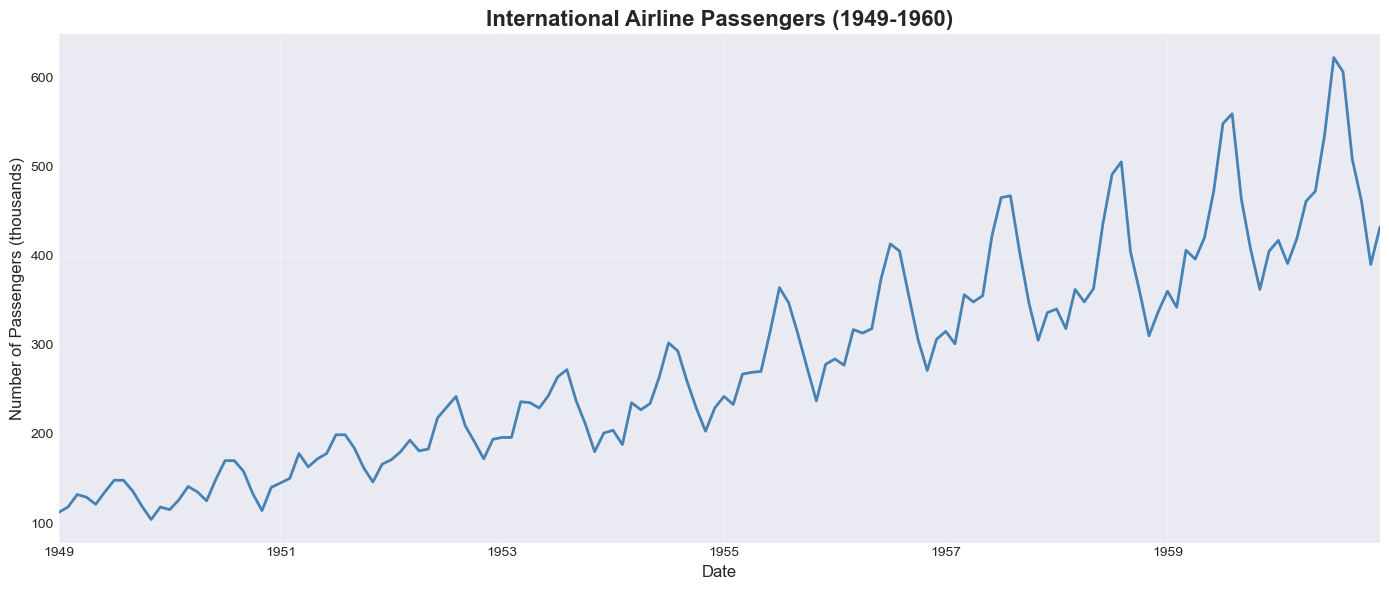


Visual observations:
Clear upward trend (air travel growth)
Seasonal pattern (peaks in summer months)
Increasing variance over time → Multiplicative model likely better


In [11]:
# Plot raw data
fig, ax = plt.subplots(figsize=(14, 6))

airline['Thousands of Passengers'].plot(ax=ax, linewidth=2, color='steelblue')

ax.set_title('International Airline Passengers (1949-1960)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Passengers (thousands)', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVisual observations:")
print("Clear upward trend (air travel growth)")
print("Seasonal pattern (peaks in summer months)")
print("Increasing variance over time → Multiplicative model likely better")

## 3. Additive Decomposition

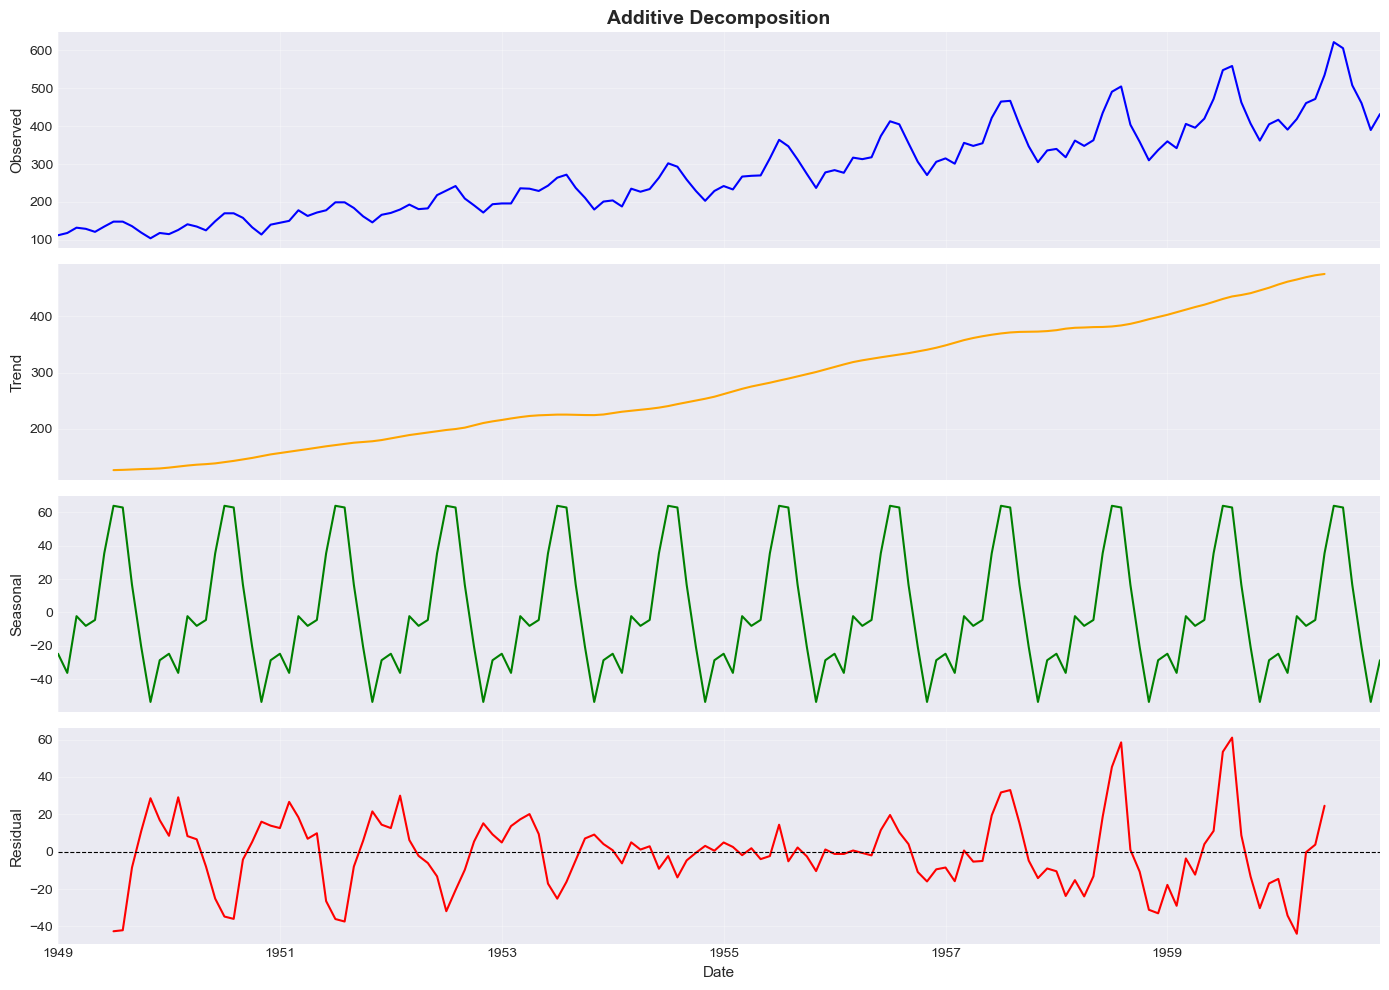


Additive model interpretation:
- Trend: Smooth upward movement
- Seasonal: Fixed amplitude pattern (same peaks/troughs each year)
- Residual: Random noise (should be white noise if model is good)


In [13]:
# Perform additive decomposition
# Y = Trend + Seasonal + Residual
# Use when seasonal variations are roughly constant

decomposition_add = seasonal_decompose(airline['Thousands of Passengers'], 
                                       model='additive', 
                                       period=12)  # 12 months = 1 year

# Plot decomposition components
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Original
decomposition_add.observed.plot(ax=axes[0], color='blue')
axes[0].set_ylabel('Observed', fontsize=11)
axes[0].set_title('Additive Decomposition', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Trend
decomposition_add.trend.plot(ax=axes[1], color='orange')
axes[1].set_ylabel('Trend', fontsize=11)
axes[1].grid(True, alpha=0.3)

# Seasonal
decomposition_add.seasonal.plot(ax=axes[2], color='green')
axes[2].set_ylabel('Seasonal', fontsize=11)
axes[2].grid(True, alpha=0.3)

# Residual
decomposition_add.resid.plot(ax=axes[3], color='red')
axes[3].set_ylabel('Residual', fontsize=11)
axes[3].set_xlabel('Date', fontsize=11)
axes[3].grid(True, alpha=0.3)
axes[3].axhline(y=0, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

print("\nAdditive model interpretation:")
print("- Trend: Smooth upward movement")
print("- Seasonal: Fixed amplitude pattern (same peaks/troughs each year)")
print("- Residual: Random noise (should be white noise if model is good)")

## 4. Multiplicative Decomposition

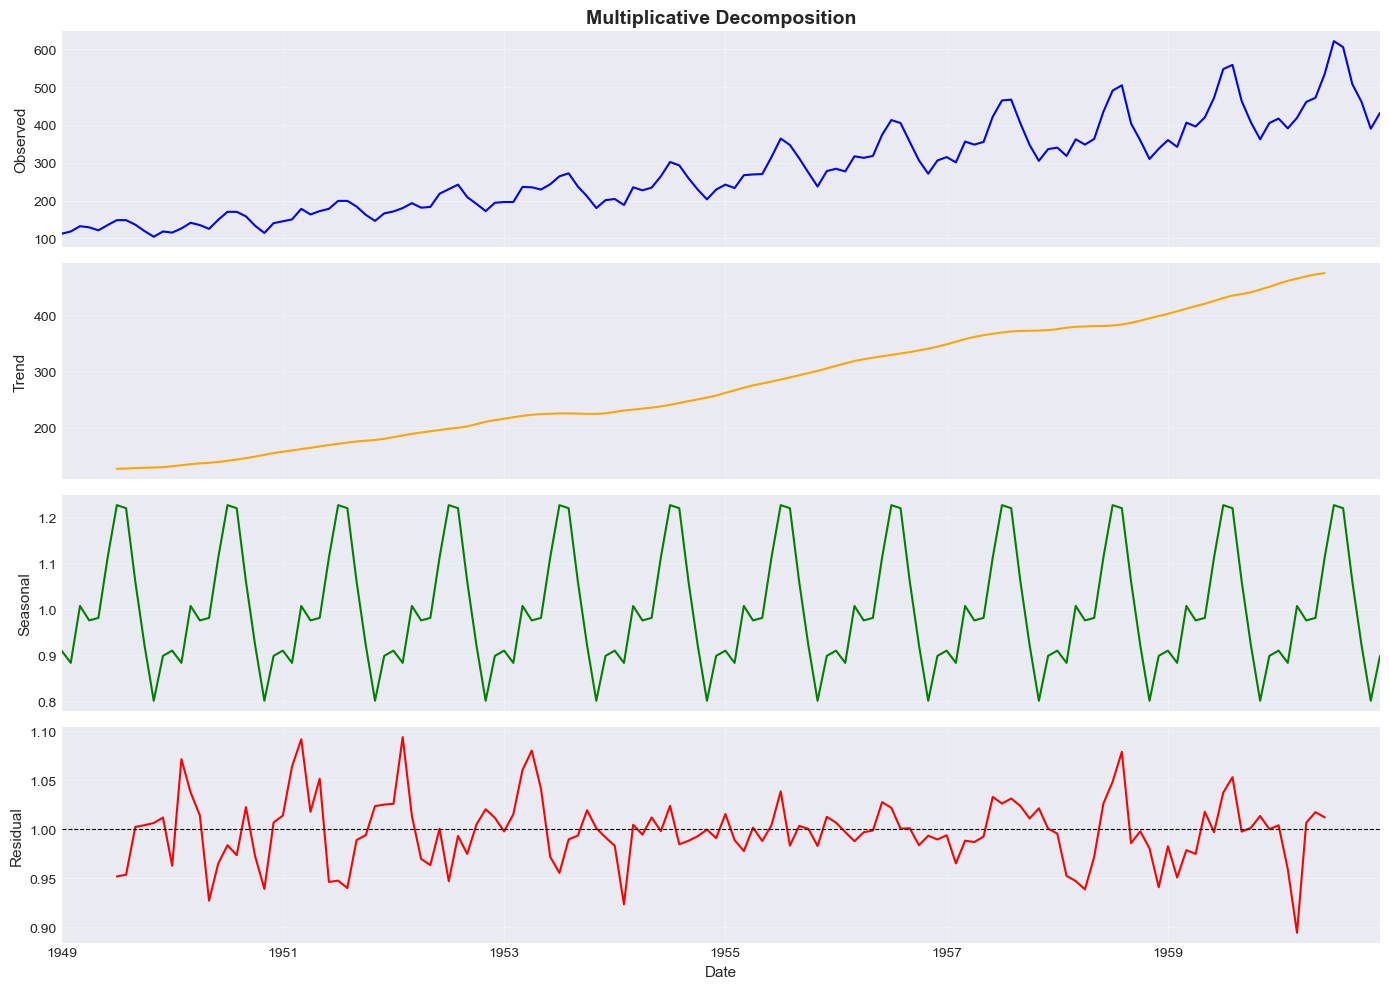


Multiplicative model interpretation:
- Trend: Exponential growth pattern
- Seasonal: Proportional variations (grows with trend level)
- Residual: Centered around 1.0 (multiplicative noise)


In [14]:
# Perform multiplicative decomposition
# Y = Trend × Seasonal × Residual
# Use when seasonal variations grow proportionally with trend

decomposition_mult = seasonal_decompose(airline['Thousands of Passengers'], 
                                        model='multiplicative', 
                                        period=12)

# Plot decomposition components
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Original
decomposition_mult.observed.plot(ax=axes[0], color='blue')
axes[0].set_ylabel('Observed', fontsize=11)
axes[0].set_title('Multiplicative Decomposition', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Trend
decomposition_mult.trend.plot(ax=axes[1], color='orange')
axes[1].set_ylabel('Trend', fontsize=11)
axes[1].grid(True, alpha=0.3)

# Seasonal
decomposition_mult.seasonal.plot(ax=axes[2], color='green')
axes[2].set_ylabel('Seasonal', fontsize=11)
axes[2].grid(True, alpha=0.3)

# Residual
decomposition_mult.resid.plot(ax=axes[3], color='red')
axes[3].set_ylabel('Residual', fontsize=11)
axes[3].set_xlabel('Date', fontsize=11)
axes[3].grid(True, alpha=0.3)
axes[3].axhline(y=1, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

print("\nMultiplicative model interpretation:")
print("- Trend: Exponential growth pattern")
print("- Seasonal: Proportional variations (grows with trend level)")
print("- Residual: Centered around 1.0 (multiplicative noise)")

## 5. Compare Residuals (Model Quality)

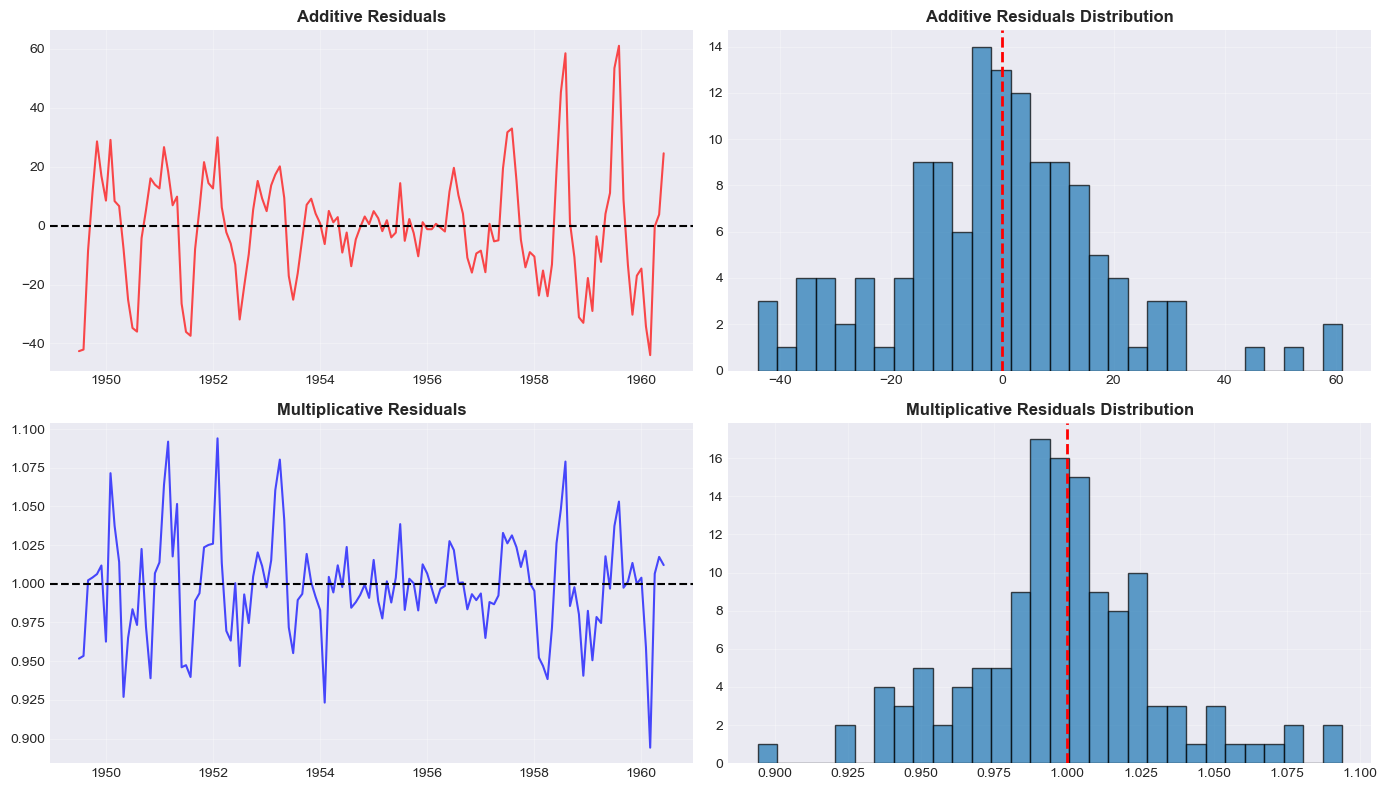


Residual Statistics:

Additive Model:
  Mean: -0.7513
  Std Dev: 19.3405

Multiplicative Model:
  Mean: 0.9982
  Std Dev: 0.0334

→ Multiplicative model likely better (smaller, more centered residuals)


In [15]:
# Compare residuals to determine which model fits better
# Good residuals should:
# 1. Have mean ≈ 0 (or 1 for multiplicative)
# 2. Have constant variance (homoscedastic)
# 3. Be normally distributed
# 4. Show no autocorrelation (white noise)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Additive residuals
axes[0, 0].plot(decomposition_add.resid, color='red', alpha=0.7)
axes[0, 0].set_title('Additive Residuals', fontsize=12, fontweight='bold')
axes[0, 0].axhline(y=0, color='black', linestyle='--')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(decomposition_add.resid.dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Additive Residuals Distribution', fontsize=12, fontweight='bold')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].grid(True, alpha=0.3)

# Multiplicative residuals
axes[1, 0].plot(decomposition_mult.resid, color='blue', alpha=0.7)
axes[1, 0].set_title('Multiplicative Residuals', fontsize=12, fontweight='bold')
axes[1, 0].axhline(y=1, color='black', linestyle='--')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(decomposition_mult.resid.dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Multiplicative Residuals Distribution', fontsize=12, fontweight='bold')
axes[1, 1].axvline(x=1, color='red', linestyle='--', linewidth=2)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate residual statistics
print("\nResidual Statistics:")
print("="*50)
print(f"\nAdditive Model:")
print(f"  Mean: {decomposition_add.resid.mean():.4f}")
print(f"  Std Dev: {decomposition_add.resid.std():.4f}")

print(f"\nMultiplicative Model:")
print(f"  Mean: {decomposition_mult.resid.mean():.4f}")
print(f"  Std Dev: {decomposition_mult.resid.std():.4f}")

print("\n→ Multiplicative model likely better (smaller, more centered residuals)")

## 6. Key Takeaways

### ETS Decomposition:
1. **Identifies components**: Separates trend, seasonality, noise
2. **Model selection**: Additive vs Multiplicative
3. **Feature engineering**: Extract seasonal patterns
4. **Forecasting**: Predict each component separately

### When to use each model:

**Additive (Y = T + S + E)**:
- Constant seasonal variations
- Stable variance over time
- Example: Temperature data

**Multiplicative (Y = T × S × E)**:
- Seasonal variations grow with level
- Increasing variance (heteroscedastic)
- Example: Sales, airline passengers, stock prices

### Applications in Finance:
- Retail sales forecasting
- Revenue prediction (quarterly seasonality)
- Tourism demand modeling
- Commodity prices (harvest cycles)


---
*Next: ARIMA modeling for forecasting*